#1.Download the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Projects/Bank churn Prediction/Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#2.Preprocessing the data

In [ ]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#No null values
#if null value then
#new_data=
#data.dropna() for drop null values
#data.interpolate() for mean
#data.fillna(method="bfill") for backward value filling
#data.fillna(method="ffill",limit=1) for Setting forward fill limit to 1
#data.fillna(method="ffill") for forward fill value
#data.fillna(0) Filling missing values with 0

####dropping the irrelavent data which will not disturb the prediction

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) #columns-axis-1

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


####converting categorical data to numerical data


In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#to make it more simpler
data=pd.get_dummies(data,drop_first=True)
#here one variable will be missing
#france will be missing so we can say that
#if germeny =0 , spain=0 then automatically france=1 same with male and female

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

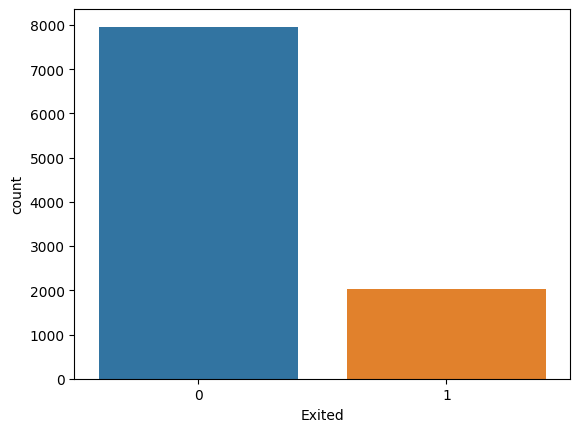

In [ ]:
import seaborn as sns
sns.countplot(x=data['Exited'])

In [ ]:
X=data.drop('Exited',axis=1) # independent variables
y=data['Exited'] #dependent variable

In [ ]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

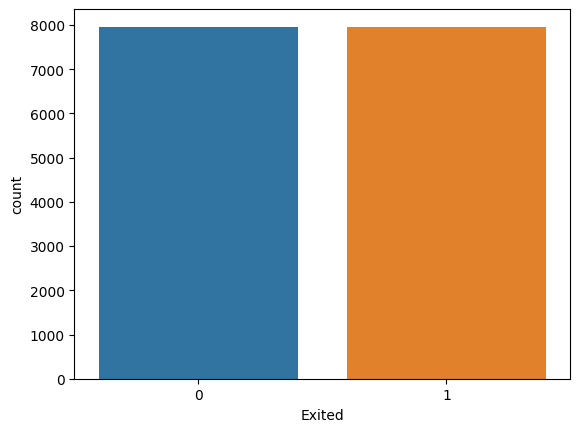

In [ ]:
sns.countplot(x=y_res)

#3.Splitting the data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.30,random_state=42)

#4.Training the model

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
print("accuracy score:",accuracy_score(y_test,y_pred1))
print("precision score:",precision_score(y_test,y_pred1))
print("recall score:",recall_score(y_test,y_pred1))
print("f1 score:",f1_score(y_test,y_pred1))

accuracy score: 0.7879866052741733
precision score: 0.7760824742268041
recall score: 0.8001700680272109
f1 score: 0.7879422231526063


###SVC

In [ ]:
from sklearn import svm

In [ ]:
svm=svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2=svm.predict(X_test)

In [ ]:
print("accuracy score:",accuracy_score(y_test,y_pred2))
print("precision score:",precision_score(y_test,y_pred2))
print("recall score:",recall_score(y_test,y_pred2))
print("f1 score:",f1_score(y_test,y_pred2))

accuracy score: 0.8336123901213897
precision score: 0.8275136726966765
recall score: 0.8363095238095238
f1 score: 0.8318883484880524


###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=knn.predict(X_test)

In [ ]:
print("accuracy score:",accuracy_score(y_test,y_pred3))
print("precision score:",precision_score(y_test,y_pred3))
print("recall score:",recall_score(y_test,y_pred3))
print("f1 score:",f1_score(y_test,y_pred3))

accuracy score: 0.8147760569275848
precision score: 0.7968433832456495
recall score: 0.8371598639455783
f1 score: 0.8165042504665145


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=dt.predict(X_test)

In [ ]:
print("accuracy score:",accuracy_score(y_test,y_pred4))
print("precision score:",precision_score(y_test,y_pred4))
print("recall score:",recall_score(y_test,y_pred4))
print("f1 score:",f1_score(y_test,y_pred4))

accuracy score: 0.7980326496442026
precision score: 0.7843378433784338
recall score: 0.8133503401360545
f1 score: 0.7985806720935087


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5=rf.predict(X_test)

In [ ]:
print("accuracy score:",accuracy_score(y_test,y_pred5))
print("precision score:",precision_score(y_test,y_pred5))
print("recall score:",recall_score(y_test,y_pred5))
print("f1 score:",f1_score(y_test,y_pred5))

accuracy score: 0.8574717455002093
precision score: 0.8511979823455234
recall score: 0.860969387755102
f1 score: 0.8560558021559924


#5.Evaluating

In [ ]:
final_data_acc=pd.DataFrame({'Models':["LR","SVC","KNN","DT","RF"],
                         "Accuracy":[accuracy_score(y_test,y_pred1),
                                     accuracy_score(y_test,y_pred2),
                                     accuracy_score(y_test,y_pred3),
                                     accuracy_score(y_test,y_pred4),
                                     accuracy_score(y_test,y_pred5)]})

In [ ]:
final_data_acc

,Models,Accuracy
0,LR,0.787987
1,SVC,0.833612
2,KNN,0.814776
3,DT,0.798033
4,RF,0.857472


<Axes: xlabel='Models', ylabel='Accuracy'>

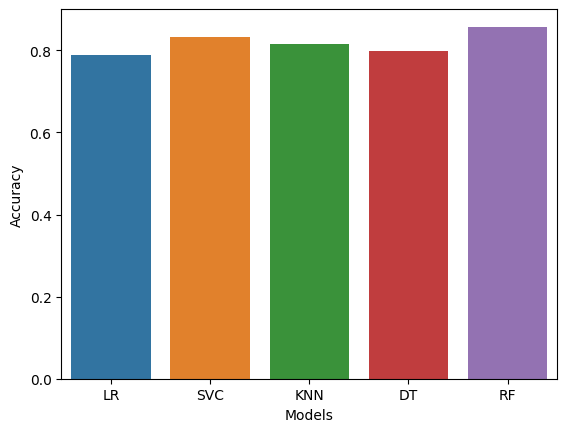

In [ ]:
sns.barplot(x=final_data_acc['Models'],y=final_data_acc['Accuracy'])

In [ ]:
final_data_prec=pd.DataFrame({'Models':["LR","SVC","KNN","DT","RF"],
                         'Precision':[precision_score(y_test,y_pred1),
                                      precision_score(y_test,y_pred2),
                                      precision_score(y_test,y_pred3),
                                      precision_score(y_test,y_pred4),
                                      precision_score(y_test,y_pred5)]})

In [ ]:
final_data_prec

,Models,Precision
0,LR,0.776082
1,SVC,0.827514
2,KNN,0.796843
3,DT,0.784338
4,RF,0.851198


<Axes: xlabel='Models', ylabel='Precision'>

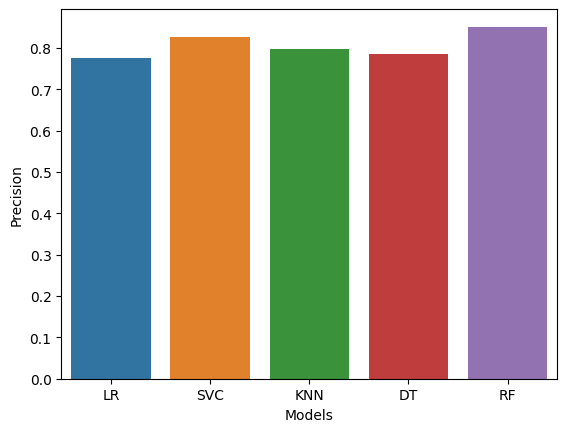

In [ ]:
sns.barplot(x=final_data_prec['Models'],y=final_data_prec['Precision'])

In [ ]:
final_data_recall=pd.DataFrame({'Models':["LR","SVC","KNN","DT","RF"],
                         'Recall':[recall_score(y_test,y_pred1),
                                   recall_score(y_test,y_pred2),
                                   recall_score(y_test,y_pred3),
                                   recall_score(y_test,y_pred4),
                                   recall_score(y_test,y_pred5)]})

In [ ]:
final_data_recall

,Models,Recall
0,LR,0.800170
1,SVC,0.836310
2,KNN,0.837160
3,DT,0.813350
4,RF,0.860969


<Axes: xlabel='Models', ylabel='Recall'>

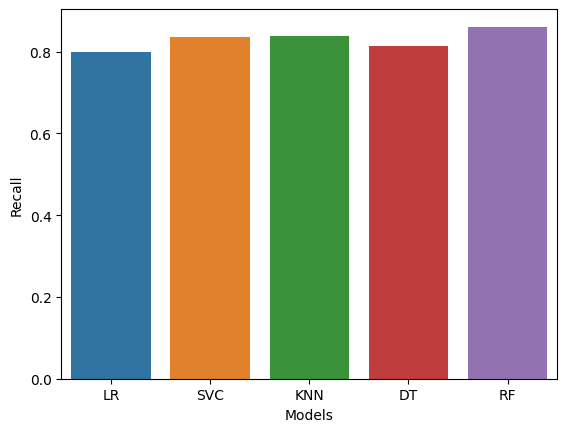

In [ ]:
sns.barplot(x=final_data_recall['Models'],y=final_data_recall['Recall'])

In [ ]:
final_data_f1=pd.DataFrame({'Models':["LR","SVC","KNN","DT","RF"],
                         'f1':[f1_score(y_test,y_pred1),
                               f1_score(y_test,y_pred2),
                               f1_score(y_test,y_pred3),
                               f1_score(y_test,y_pred4),
                               f1_score(y_test,y_pred5)]})

In [ ]:
final_data_f1

,Models,f1
0,LR,0.787942
1,SVC,0.831888
2,KNN,0.816504
3,DT,0.798581
4,RF,0.856056


<Axes: xlabel='Models', ylabel='f1'>

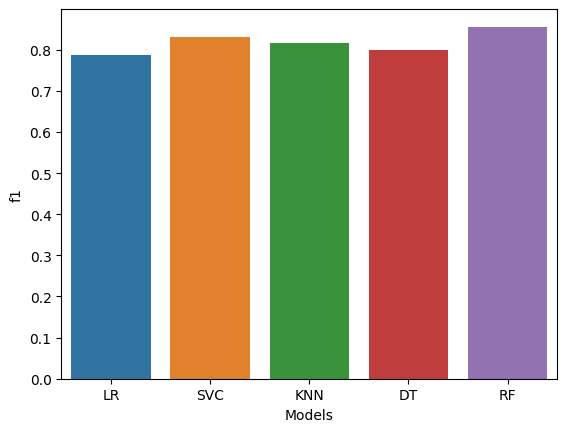

In [ ]:
sns.barplot(x=final_data_f1['Models'],y=final_data_f1['f1'])

#6.Best model

In [ ]:
X_res=sc.fit_transform(X_res)

In [ ]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [ ]:
model=joblib.load("churn_predict_model")

In [ ]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
result=(model.predict([[123,32,2,0.0,0,0,0,101.88,0,0,0]]))
if result == 1:
  print("Customer is about to leave")
else:
  print("Customer is not willing to leave")

Customer is about to leave
